In [25]:
#워드클라우드
from PIL import *
import pandas as pd
from konlpy.tag import Kkma
import matplotlib.pyplot as plt  #pip 먼저 해야함
from matplotlib import font_manager, rc  #pip 먼저 해야함  
from wordcloud import WordCloud   #pip 먼저 해야함
# wordcloud 설치할 때 setuptools 에러나면 아래 코드 실행후 재실행
# pip install -U pip setuptools

from collections import Counter
import numpy as np

In [40]:
# 그래프 글씨 한글
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

### 기존의 부정 리뷰 워드클라우드

In [52]:
m = pd.read_csv('./data/musinsa.csv')
m.head()

,_id,user_level,user_name,user_sex,user_height,user_weight,brand,product,date,starss,review,link
0,644ce41a9f86d024f989fd61,7.0,연산동아재,남성,182,88,비전스트릿웨어,VSW D-Logo Crewneck Blue,2022.01.01,5,가성비대비 입기 너무 좋아요 편하게 잘 입을수 있을것 같아요,/2211601/0
1,644ce41a9f86d024f989fd62,5.0,꼬냥선생,모름,0,0,무신사 스탠다드,사피아노 신세틱 레더 벨트,2022.01.01,5,허리가 정도 되는데 마지막 칸에 넣어야 맞네요 사이즈 사도 될거 같아요,/1220731/0
2,644ce41a9f86d024f989fd63,5.0,poad11,모름,0,0,돈애스크마이플랜,댐프 오버사이즈 머플러_그린,2022.01.01,5,크으 진짜 최근에 구매한 머플러중 만족도 최강입니다 무조건 사세요,/2265237/0
3,644ce41a9f86d024f989fd64,4.0,여행의도중,남성,175,77,커버낫,RDS 플러피 다운 파카 블랙,2022.01.01,5,옷은 약간 오버핏으로 나온거같고 입으면 편하네요 보온성은 그렇게 나쁘진 않지만 ...,/2080867/0
4,644ce41a9f86d024f989fd65,3.0,패피의여정,남성,170,62,무신사 스탠다드,베이식 블레이저 [블랙],2022.01.01,4,꾸안꾸 블레이저로 입기에는 소재나 사이즈가 정장에 가까운 느낌이에요 한치수 업해서 ...,/1108007/0


In [53]:
kkma = Kkma()  # 형태소 분석기 꼬꼬마(Kkma)

nouns_m = m[m.starss<3]['review'].apply(lambda x: kkma.nouns(str(x)))
nouns_m

819                                        [오고, 번, 자크, 지퍼]
875                           [목, 목부분, 부분, 이것, 거위, 뭐, 어려움]
1416     [구매, 만원, 세일, 세일시반쯤, 시, 반쯤, 출고, 요청, 중, 취소, 환불, ...
1508     [무선, 충전, 홍보, 풀잎, 풀잎특성상, 특성, 상, 한쪽, 배터리, 부분, 자수...
2025     [보풀, 무엇, 물이, 왤, 베이지, 톤, 옷, 바지, 검, 화, 퀄리티, 깡, 유...
                               ...                        
43610         [옷, 맨투맨, 각, 뭐, 입지, 다음, 검수, 부탁, 택, 원래, 때, 당황]
43666                        [생각, 재질, 옷, 허벅지, 허리, 사이즈, 만족]
44159                           [기장, 로, 전체적, 품, 약간, 슬림, 터]
44197    [재질, 실, 목, 목부분, 부분, 움, 댓, 댓글, 글, 모자, 거, 프, 프때,...
44200                                    [기장, 품, 삐, 수선, 옷]
Name: review, Length: 151, dtype: object

In [54]:
nouns_m = nouns_m.explode()
nouns_m

819      오고
819       번
819      자크
819      지퍼
875       목
         ..
44200    기장
44200     품
44200     삐
44200    수선
44200     옷
Name: review, Length: 2490, dtype: object

In [55]:
df_word = pd.DataFrame({'word' : nouns_m})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
819,오고,2
819,자크,2
819,지퍼,2
875,목부분,3
875,부분,2
...,...,...
44197,취소,2
44197,디자인,3
44197,인정,2
44200,기장,2


In [56]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
68,구매,27
0,가격,20
357,생각,19
607,재질,18
297,부분,17
...,...,...
504,요가,1
503,왼쪽,1
502,외배송,1
501,완전,1


In [57]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'구매': 27,
 '가격': 20,
 '생각': 19,
 '재질': 18,
 '부분': 17,
 '사이즈': 16,
 '제품': 15,
 '사진': 15,
 '정도': 14,
 '배송': 13,
 '교환': 13,
 '반품': 12,
 '불량': 10,
 '상품': 9,
 '리뷰': 9,
 '디자인': 9,
 '사람': 9,
 '처음': 9,
 '실망': 9,
 '브랜드': 9,
 '상태': 8,
 '주문': 8,
 '불편': 8,
 '환불': 8,
 '택배': 7,
 '바지': 7,
 '퀄리티': 7,
 '보풀': 7,
 '문의': 7,
 '주고': 7,
 '제가': 7,
 '느낌': 7,
 '색감': 7,
 '진짜': 6,
 '사용': 6,
 '기장': 6,
 '착용': 6,
 '만족': 6,
 '이상': 6,
 '허리': 6,
 '색상': 6,
 '이거': 6,
 '후기': 6,
 '잠옷': 6,
 '세탁': 6,
 '마음': 5,
 '박음질': 5,
 '마감': 5,
 '만원': 5,
 '길이': 5,
 '문제': 5,
 '동안': 5,
 '신사': 5,
 '사이': 5,
 '단추': 5,
 '요청': 5,
 '실밥': 5,
 '착화': 4,
 '기분': 4,
 '원래': 4,
 '참고': 4,
 '유의': 4,
 '장점': 4,
 '의사': 4,
 '주머니': 4,
 '대비': 4,
 '최악': 4,
 '기대': 4,
 '있음': 4,
 '라인': 4,
 '입장': 4,
 '지에': 4,
 '이것': 4,
 '두께': 4,
 '일주일': 4,
 '처리': 4,
 '일어': 4,
 '가능': 4,
 '발목': 4,
 '신어': 4,
 '한번': 4,
 '택배사': 4,
 '검수': 4,
 '밑위': 4,
 '포장': 4,
 '후회': 4,
 '살이': 4,
 '신고': 4,
 '구입': 4,
 '품질': 4,
 '수선': 3,
 '도착': 3,
 '자국': 3,
 '댓글': 3,
 '매장': 3,
 '본인': 3,
 '소재': 3,
 '보여': 3,

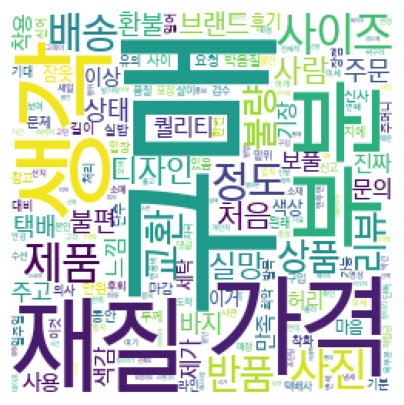

In [58]:
font_path = 'C:/Windows/Fonts/LG PC.ttf'
wc = WordCloud(random_state = 50, font_path = font_path, width = 250,
               height = 250, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (5, 5)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('모델 예측 이후의 워드 클라우드') # 파일 저장


### 모델 적용 후 부정 리뷰 워드클라우드

In [82]:
mu = pd.read_csv('./data/musinsa_model_predict.csv')
mu.head()

,user_name,starss,review,predict_result,predict_result_persent,predict_result_review
0,연산동아재,5,가성비대비 입기 너무 좋아요 편하게 잘 입을수 있을것 같아요,77.13% 확률로 긍정 리뷰입니다.\r\n,77.13,긍정
1,꼬냥선생,5,허리가 정도 되는데 마지막 칸에 넣어야 맞네요 사이즈 사도 될거 같아요,50.11% 확률로 긍정 리뷰입니다.\r\n,50.11,긍정
2,poad11,5,크으 진짜 최근에 구매한 머플러중 만족도 최강입니다 무조건 사세요,88.10% 확률로 긍정 리뷰입니다.\r\n,88.10,긍정
3,여행의도중,5,옷은 약간 오버핏으로 나온거같고 입으면 편하네요 보온성은 그렇게 나쁘진 않지만 ...,78.29% 확률로 부정 리뷰입니다.\r\n,78.29,부정
4,패피의여정,4,꾸안꾸 블레이저로 입기에는 소재나 사이즈가 정장에 가까운 느낌이에요 한치수 업해서 ...,74.46% 확률로 부정 리뷰입니다.\r\n,74.46,부정


In [84]:
kkma = Kkma()  # 형태소 분석기 꼬꼬마(Kkma)

nouns = mu[(mu.predict_result_review=='부정')]['review'].apply(lambda x: kkma.nouns(str(x)))
nouns

KeyboardInterrupt: 

In [ ]:
nouns = nouns.explode()
nouns

3          옷
3         오버
3        오버핏
3          핏
3          거
        ... 
44381     기모
44381      핏
44382    사이즈
44382     마음
44382     색상
Name: review, Length: 153305, dtype: object

In [ ]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
3,오버,2.0
3,오버핏,3.0
3,보온성,3.0
3,완전,2.0
3,완전추운날,5.0
...,...,...
44381,길이,2.0
44381,기모,2.0
44382,사이즈,3.0
44382,마음,2.0


In [ ]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
5224,사이즈,3016
3321,만족,1857
952,구매,1698
3,가격,1517
5481,색감,1378
...,...,...
5379,삿는데기장,1
5375,삿구,1
5374,삿건,1
5370,삼의,1


In [ ]:
(df_word.set_index('word')/df_word.shape[0])[:10]

,count
word,
사이즈,0.241705
만족,0.148822
구매,0.136079
가격,0.121574
색감,0.110434
바지,0.108912
생각,0.107629
마음,0.089998
여름,0.083587


In [ ]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'가가': 1,
 '유럽': 1,
 '유날씨': 1,
 '유넥': 1,
 '유념': 1,
 '유니': 1,
 '유니섹스': 1,
 '유니온': 1,
 '유니온블루': 1,
 '유니크': 1,
 '유니크하': 1,
 '유니크하네': 1,
 '유니크하먼': 1,
 '유니크하면': 1,
 '유니크한': 1,
 '유니크함': 1,
 '유니크합니': 1,
 '유니크해': 1,
 '유니크해요사': 1,
 '유니폼': 1,
 '유니폼브릿지': 1,
 '유니폼브릿지의': 1,
 '유닉크': 1,
 '유꺼': 1,
 '유기현씨': 1,
 '유기현': 1,
 '윈드브레이커': 1,
 '위주': 1,
 '위쪽': 1,
 '위치': 1,
 '위캔더스': 1,
 '위트': 1,
 '위험': 1,
 '위험도': 1,
 '위협': 1,
 '윈드': 1,
 '윈드브레이크': 1,
 '유기': 1,
 '윈턱': 1,
 '윗단추': 1,
 '윗배': 1,
 '윗부분': 1,
 '윗뼈': 1,
 '윗옷': 1,
 '유광': 1,
 '유교': 1,
 '유교걸': 1,
 '유도': 1,
 '유령': 1,
 '유행인': 1,
 '유료': 1,
 '유일': 1,
 '유일한': 1,
 '유재': 1,
 '유저': 1,
 '유제': 1,
 '유지': 1,
 '유치': 1,
 '유치마랑': 1,
 '유치원': 1,
 '유털이': 1,
 '유투버': 1,
 '유투버랄': 1,
 '유투버분': 1,
 '유튜버': 1,
 '유튜버님': 1,
 '유튜브': 1,
 '유튜브보고': 1,
 '유튭': 1,
 '유틸리티': 1,
 '유학생': 1,
 '유행': 1,
 '유의하세': 1,
 '유의': 1,
 '유원': 1,
 '유사시': 1,
 '유명': 1,
 '유명템': 1,
 '유명하다': 1,
 '유무로': 1,
 '유발': 1,
 '유보풀': 1,
 '유봄': 1,
 '유부': 1,
 '유사': 1,
 '유사해용': 1,
 '유용': 1,
 '유산소': 1,
 '유색': 1,
 '유스': 1,
 '유심': 1

Text(0.5, 1.0, '모델 적용 이후 리뷰의 워드클라우드')

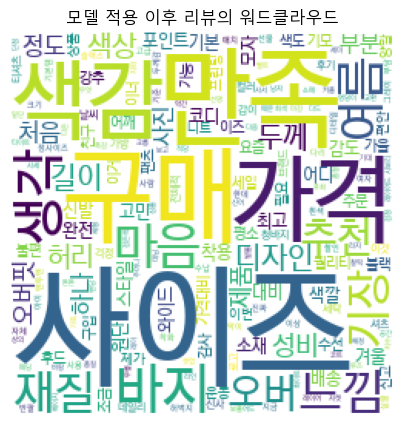

In [ ]:
font_path = 'C:/Windows/Fonts/LG PC.ttf'
wc = WordCloud(random_state = 50, font_path = font_path, width = 250,
               height = 250, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (5, 5)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('모델 예측 이후의 워드 클라우드') # 파일 저장
plt.title('모델 적용 이후 리뷰의 워드클라우드')

